In [84]:
import warnings
warnings.filterwarnings('ignore')

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [86]:
data = pd.read_csv('nasa.csv')

In [87]:
data.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [89]:
data.select_dtypes(object)


,Close Approach Date,Orbiting Body,Orbit Determination Date,Equinox
0,1995-01-01,Earth,2017-04-06 08:36:37,J2000
1,1995-01-01,Earth,2017-04-06 08:32:49,J2000
2,1995-01-08,Earth,2017-04-06 09:20:19,J2000
3,1995-01-15,Earth,2017-04-06 09:15:49,J2000
4,1995-01-15,Earth,2017-04-06 08:57:58,J2000
...,...,...,...,...
4682,2016-09-08,Earth,2017-04-06 08:24:07,J2000
4683,2016-09-08,Earth,2017-04-06 08:23:58,J2000
4684,2016-09-08,Earth,2017-04-06 08:23:43,J2000
4685,2016-09-08,Earth,2017-04-06 08:23:42,J2000


In [90]:
data.drop("Equinox", axis=1, inplace=True)

In [91]:
data.drop("Orbiting Body", axis=1, inplace=True)

In [92]:
data.select_dtypes(object)


,Close Approach Date,Orbit Determination Date
0,1995-01-01,2017-04-06 08:36:37
1,1995-01-01,2017-04-06 08:32:49
2,1995-01-08,2017-04-06 09:20:19
3,1995-01-15,2017-04-06 09:15:49
4,1995-01-15,2017-04-06 08:57:58
...,...,...
4682,2016-09-08,2017-04-06 08:24:07
4683,2016-09-08,2017-04-06 08:23:58
4684,2016-09-08,2017-04-06 08:23:43
4685,2016-09-08,2017-04-06 08:23:42


In [93]:
data.drop("Orbit Determination Date", axis=1, inplace=True)

In [94]:
data.drop("Close Approach Date", axis=1, inplace=True)

In [95]:
data

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,3703080,3703080,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,True
1,3723955,3723955,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,False
2,2446862,2446862,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,True
3,3092506,3092506,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,False
4,3514799,3514799,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,3759007,3759007,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,...,39.880491,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,False
4683,3759295,3759295,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,...,5.360249,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,False
4684,3759714,3759714,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,...,4.405467,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,False
4685,3759720,3759720,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,...,21.080244,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,False


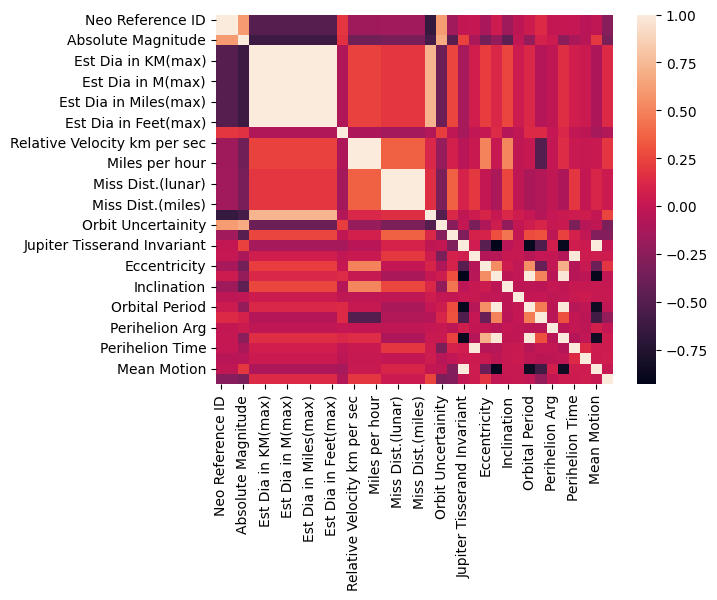

In [96]:
sns.heatmap(data.corr());


up untill now I only worked with the data to make it ready for the model

Logistic Regression

In [97]:
train = data.drop('Hazardous', axis=1)
target = data['Hazardous']

In [98]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.25, random_state=0)

In [99]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()

In [100]:
logReg.fit(x_train, y_train)

LogisticRegression()

In [101]:
predictLog = logReg.predict(x_test)

In [102]:
scoreLog = metrics.accuracy_score(y_test, predictLog)

print(scoreLog)

0.8395904436860068


this is the score of the logistic regression model 

Decision Tree

In [103]:
from sklearn.tree import DecisionTreeClassifier


In [104]:
decTree = DecisionTreeClassifier()

In [105]:
decTree = decTree.fit(x_train, y_train) 
predictTree = decTree.predict(x_test) 


In [106]:
scoreTree = metrics.accuracy_score(y_test, predictTree)
print(scoreTree)

0.9940273037542662


score of decision tree

Ensable Model Random Forest

In [107]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [108]:
ranFor = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [109]:
ranFor.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [110]:
predictRan = ranFor.predict(x_test)

In [111]:
threshold = 0.5
binary_predictRan = [1 if p >= threshold else 0 for p in predictRan]
accuracy_score(y_test, binary_predictRan)


0.9957337883959044

In [112]:
confusion_matrix(y_test, binary_predictRan)


array([[984,   0],
       [  5, 183]])

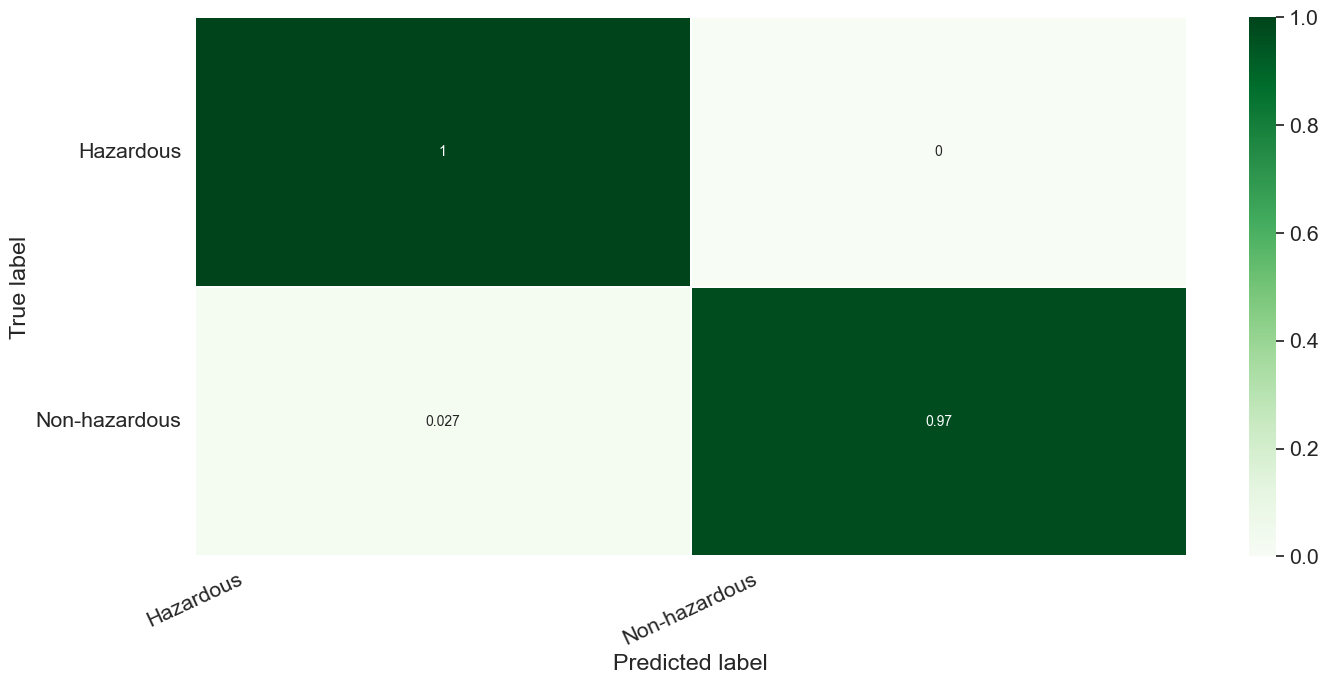

In [113]:

matrix = confusion_matrix(y_test, binary_predictRan)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]


plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['Hazardous', 'Non-hazardous']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [114]:
print(classification_report(y_test,predictLog))

              precision    recall  f1-score   support

       False       0.84      1.00      0.91       984
        True       0.00      0.00      0.00       188

    accuracy                           0.84      1172
   macro avg       0.42      0.50      0.46      1172
weighted avg       0.70      0.84      0.77      1172



In [115]:
print(classification_report(y_test,predictTree))

              precision    recall  f1-score   support

       False       0.99      1.00      1.00       984
        True       1.00      0.96      0.98       188

    accuracy                           0.99      1172
   macro avg       1.00      0.98      0.99      1172
weighted avg       0.99      0.99      0.99      1172



In [116]:
print(classification_report(y_test,binary_predictRan))

              precision    recall  f1-score   support

       False       0.99      1.00      1.00       984
        True       1.00      0.97      0.99       188

    accuracy                           1.00      1172
   macro avg       1.00      0.99      0.99      1172
weighted avg       1.00      1.00      1.00      1172



as we can see that out of the three model decision tree is the best and the logistic regression is the worst in terms of f1-score
but in decision tree we know that the model is overfitting so we will use the random forest model to get the model for usage.

